Template Path Exists: True
Image Path Exists: True
Original Template Size: 120 x 118


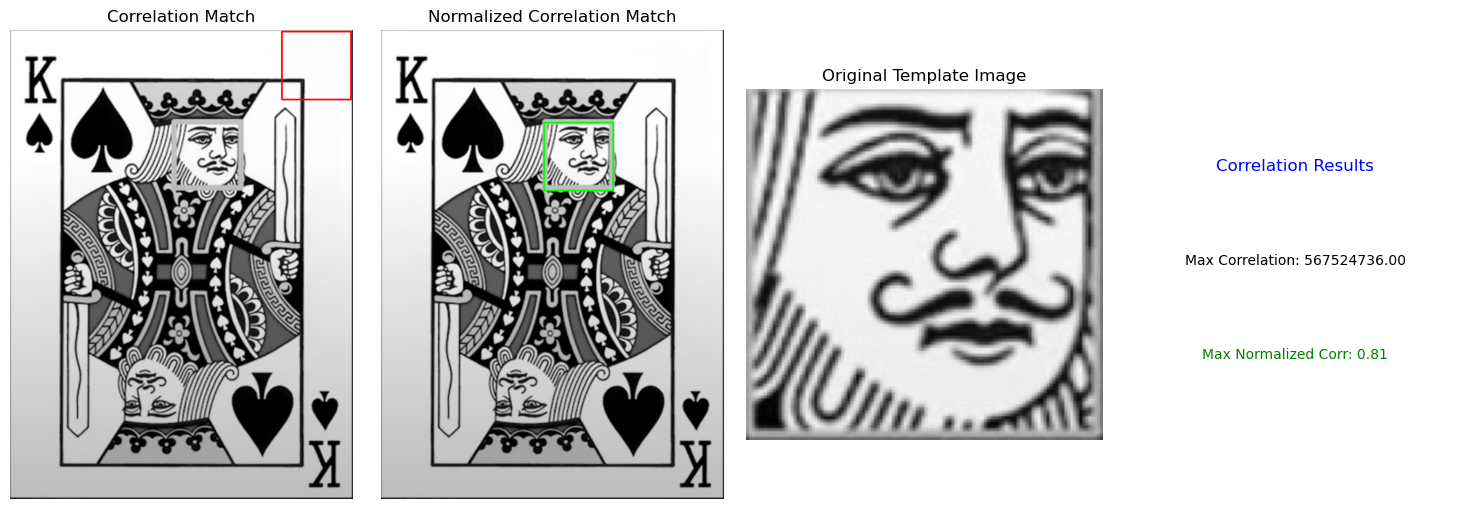

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set paths for the images
template_path = os.path.join(os.getcwd(), 'data', 'images', 'king_template.jpeg')  # Original template image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'king_image.jpeg')  # Main image

# Verify paths
print("Template Path Exists:", os.path.exists(template_path))
print("Image Path Exists:", os.path.exists(image_path))

# Load the images in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if image is None or template is None:
    print("Error: Could not read one of the images.")
    if image is None:
        print(f"Failed to load image from path: {image_path}")
    if template is None:
        print(f"Failed to load template from path: {template_path}")
    exit()

# Display the original template size
original_template_height, original_template_width = template.shape
print(f"Original Template Size: {original_template_width} x {original_template_height}")

# Apply GaussianBlur to reduce noise in the image
image_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Apply template matching using basic correlation (without normalization)
result_correlation = cv2.matchTemplate(image_blur, template, cv2.TM_CCORR)

# Apply template matching using normalized correlation
result_norm_corr = cv2.matchTemplate(image_blur, template, cv2.TM_CCOEFF_NORMED)

# Locate the best match position in each result
_, max_val_corr, _, max_loc_corr = cv2.minMaxLoc(result_correlation)
_, max_val_norm, _, max_loc_norm = cv2.minMaxLoc(result_norm_corr)

# Adjust the bounding box location for correlation match to the center of the best match
adjusted_loc_corr = (max_loc_corr[0], max_loc_corr[1])  # No adjustment needed for TM_CCORR

# Define rectangles around matched regions
rect_end_corr = (adjusted_loc_corr[0] + original_template_width, adjusted_loc_corr[1] + original_template_height)
rect_end_norm = (max_loc_norm[0] + original_template_width, max_loc_norm[1] + original_template_height)

# Draw rectangles on copies of the original image to show match locations
image_corr_display = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
image_norm_display = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

cv2.rectangle(image_corr_display, adjusted_loc_corr, rect_end_corr, (255, 0, 0), 2)  # Red for correlation match
cv2.rectangle(image_norm_display, max_loc_norm, rect_end_norm, (0, 255, 0), 2)  # Green for normalized correlation match

# Display results
plt.figure(figsize=(15, 5))

# Display the original image with correlation match
plt.subplot(1, 4, 1)
plt.imshow(image_corr_display)
plt.title('Correlation Match')
plt.axis('off')

# Display the original image with normalized correlation match
plt.subplot(1, 4, 2)
plt.imshow(image_norm_display)
plt.title('Normalized Correlation Match')
plt.axis('off')

# Display the original template image
plt.subplot(1, 4, 3)
plt.imshow(template, cmap='gray')  # Display the original template
plt.title('Original Template Image')
plt.axis('off')

# Display match result text
plt.subplot(1, 4, 4)
plt.text(0.5, 0.7, 'Correlation Results', fontsize=12, ha='center', color='blue')
plt.text(0.5, 0.5, f'Max Correlation: {max_val_corr:.2f}', fontsize=10, ha='center')
plt.text(0.5, 0.3, f'Max Normalized Corr: {max_val_norm:.2f}', fontsize=10, ha='center', color='green')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


In [6]:
# Define rectangles around matched regions
rect_end_corr = (max_loc_corr[0] + original_template_width, max_loc_corr[1] + original_template_height)
rect_end_norm = (max_loc_norm[0] + original_template_width, max_loc_norm[1] + original_template_height)

# Draw rectangles on copies of the original image to show match locations
image_corr_display = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
image_norm_display = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Ensure the rectangles are defined correctly
cv2.rectangle(image_corr_display, max_loc_corr, rect_end_corr, (255, 0, 0), 2)  # Red for correlation match
cv2.rectangle(image_norm_display, max_loc_norm, rect_end_norm, (0, 255, 0), 2)  # Green for normalized correlation match


array([[[ 41,  41,  41],
        [ 62,  62,  62],
        [ 63,  63,  63],
        ...,
        [ 60,  60,  60],
        [ 28,  28,  28],
        [ 18,  18,  18]],

       [[ 92,  92,  92],
        [122, 122, 122],
        [131, 131, 131],
        ...,
        [116, 116, 116],
        [ 50,  50,  50],
        [ 18,  18,  18]],

       [[147, 147, 147],
        [188, 188, 188],
        [207, 207, 207],
        ...,
        [178, 178, 178],
        [ 83,  83,  83],
        [ 31,  31,  31]],

       ...,

       [[ 79,  79,  79],
        [104, 104, 104],
        [112, 112, 112],
        ...,
        [ 98,  98,  98],
        [ 48,  48,  48],
        [ 17,  17,  17]],

       [[ 47,  47,  47],
        [ 58,  58,  58],
        [ 57,  57,  57],
        ...,
        [ 53,  53,  53],
        [ 31,  31,  31],
        [ 18,  18,  18]],

       [[ 11,  11,  11],
        [ 13,  13,  13],
        [  7,   7,   7],
        ...,
        [ 16,  16,  16],
        [ 18,  18,  18],
        [ 19,  19,  19]]